# Algoritmo de Deutsch-Jozsa

En esta sección, primero presentamos el problema de Deutsch-Jozsa y los algoritmos clásicos y cuánticos para resolverlo. Luego implementamos el algoritmo cuántico usando Qiskit y lo ejecutamos en un simulador y en un dispositivo.

## 1. Introducción <a id="introduction"></a>

El algoritmo Deutsch-Jozsa, presentado por primera vez en la referencia [1], fue el primer ejemplo de un algoritmo cuántico que funciona mejor que el mejor algoritmo clásico. Demostró que puede haber ventajas en el uso de una computadora cuántica como herramienta computacional para un problema específico.

### 1.1 Problema de Deutsch-Jozsa <a id="djproblem"> </a>

Tenemos una función booleana oculta $f$, que toma como entrada una cadena de bits y devuelve $0$ o $1$, es decir:

$$ f({x_0,x_1,x_2,...}) \rightarrow 0 \textrm{ o } 1 \textrm{ , donde } x_n \textrm{ es } 0 \textrm{ o } 1$$

La propiedad de la función booleana dada es que se garantiza que sea balanceada o constante. Una función constante devuelve todos los $0$ o todos los $1$ para cualquier entrada, mientras que una función balanceada devuelve $0$ para exactamente la mitad de todas las entradas y $1$ para la otra mitad. Nuestra tarea es determinar si la función dada es balanceada o constante.

Ten en cuenta que el problema de Deutsch-Jozsa es una extensión de $n$ bits del problema de Deutsch de un solo bit.

### 1.2 La Solución Clásica <a id="classical-solution"> </a>

Clásicamente, en el mejor de los casos, dos consultas al oráculo pueden determinar si la función booleana oculta, $f(x)$, es balanceada: por ejemplo, si obtenemos ambas $f(0,0,0,...)\rightarrow 0$ y $f(1,0,0,...) \rightarrow 1$, entonces sabemos que la función está balanceada, ya que hemos obtenido las dos salidas diferentes.

En el peor de los casos, si continuamos viendo la misma salida para cada entrada que intentamos, tendremos que verificar exactamente la mitad de todas las entradas posibles más una para estar seguros de que $f(x)$ es constante. Dado que el número total de entradas posibles es $2^n$, esto implica que necesitamos $2^{n-1}+1$ entradas de prueba para estar seguros de que $f(x)$ es constante en el peor de los casos. Por ejemplo, para una cadena de bits de $4$, si verificamos $8$ de las $16$ combinaciones posibles, obteniendo todos los $0$, aún es posible que la entrada $9^\textrm{a}$ devuelva $1$ y $f(x)$ está balanceada. Probabilísticamente, este es un evento muy improbable. De hecho, si obtenemos el mismo resultado continuamente en sucesión, podemos expresar la probabilidad de que la función sea constante en función de $k$ entradas como:



$$ P_\textrm{constante}(k) = 1 - \frac{1}{2^{k-1}} \qquad \textrm{para } 1 < k \leq 2^{n-1}$$



Siendo realistas, podríamos optar por truncar de manera temprana nuestro algoritmo clásico, digamos si tuviéramos más de un x% de confianza. Pero si queremos estar 100% seguros, tendríamos que verificar $2^{n-1}+1$ entradas.

### 1.3 Solución Cuántica <a id="quantum-solution"> </a>

Usando una computadora cuántica, podemos resolver este problema con un 100% de confianza después de una sola llamada a la función $f(x)$, siempre que tengamos la función $f$ implementada como un oráculo cuántico, que mapea el estado $\vert x \rangle \vert y\rangle $ a $ \vert x\rangle \vert y \oplus f(x)\rangle$, donde $\oplus$ es la adición de módulo $2$. A continuación se muestra el circuito genérico para el algoritmo Deutsch-Jozsa.

![imagen1](images/deutsch_steps.png)

Ahora, repasemos los pasos del algoritmo:

<ol>
   <li>
       Prepara dos registros cuánticos. El primero es un registro de $n$ qubits inicializado en $|0\rangle$, y el segundo es un registro de un qubit inicializado en $|1\rangle$:
       

$$\vert \psi_0 \rangle = \vert0\rangle^{\otimes n} \vert 1\rangle$$


   </li>
    
   <li>
        Aplica una compuerta Hadamard a cada qubit:</li>
        

$$\vert \psi_1 \rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle \left(|0\rangle - |1 \rangle \right)$$


   </li>
   
   <li>
       Aplica el oráculo cuántico $\vert x\rangle \vert y\rangle$ a $\vert x\rangle \vert y \oplus f(x)\rangle$:
        $$
            \begin{aligned}
            \lvert \psi_2 \rangle  
                & = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle (\vert f(x)\rangle - \vert 1 \oplus f(x)\rangle) \\  
                & = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1}(-1)^{f(x)}|x\rangle ( |0\rangle - |1\rangle ) 
        \end{aligned}
        $$
       
ya que para cada $x,f(x)$ es $0$ o $1$.
   </li>

   <li>
       En este punto, se puede ignorar el segundo registro de un solo qubit. Aplica una compuerta Hadamard a cada qubit en el primer registro:
        $$
        \begin{aligned}
            \lvert \psi_3 \rangle 
                & = \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x)}
                    \left[ \sum_{y=0}^{2^n-1}(-1)^{x \cdot y} 
                    \vert y \rangle \right] \\
                & = \frac{1}{2^n}\sum_{y=0}^{2^n-1}
                    \left[ \sum_{x=0}^{2^n-1}(-1)^{f(x)}(-1)^{x \cdot y} \right]
                    \vert y \rangle
        \end{aligned}
        $$
       
donde $x \cdot y = x_0y_0 \oplus x_1y_1 \oplus \ldots \oplus x_{n-1}y_{n-1}$ es la suma del producto bit a bit.
   </li>

   <li>
       Medir el primer registro. Observa que la probabilidad de medir $\vert 0 \rangle ^{\otimes n} = \lvert \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1) ^{f(x)} \rvert^2$, que se evalúa como $1$ si $f(x)$ es constante y $0$ si $f(x)$ es balanceada. 
   </li>

</ol>

### 1.4 ¿Por qué funciona esto? <a id="why-does-this-work"> </a>

- **Oráculo Constante**

Cuando el oráculo es *constante*, no tiene efecto (hasta una fase global) en los qubits de entrada, y los estados cuánticos antes y después de consultar el oráculo son los mismos. Dado que la compuerta H es su propio inverso, en el Paso 4 invertimos el Paso 2 para obtener el estado cuántico inicial de $|00\dots 0\rangle$ en el primer registro.

$$
H^{\otimes n}\begin{bmatrix} 1 \\ 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix} 
= 
\tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
\quad \xrightarrow{\text{después de } U_f} \quad
H^{\otimes n}\tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
= 
\begin{bmatrix} 1 \\ 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix} 
$$

- **Oráculo Balanceado**

Después del paso 2, nuestro registro de entrada es una superposición igual de todos los estados en la base computacional. Cuando el oráculo está *balanceado*, el retroceso de fase añade una fase negativa a exactamente la mitad de estos estados:

$$
U_f \tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix} 
= 
\tfrac{1}{\sqrt{2^n}}\begin{bmatrix} -1 \\ 1 \\ -1 \\ \vdots \\ 1 \end{bmatrix}
$$


El estado cuántico después de consultar el oráculo es ortogonal al estado cuántico antes de consultar el oráculo. Por lo tanto, en el Paso 4, al aplicar las compuertas H, debemos terminar con un estado cuántico que sea ortogonal a $|00\dots 0\rangle$. Esto significa que nunca debemos medir el estado cero.


## 2. Ejemplo Resuelto <a id="example"></a>

Veamos un ejemplo específico para una función balanceada de dos bits: 

Considera una función de dos bits $f(x_0,x_1)=x_0 \oplus x_1$ tal que 

$f(0,0)=0$

$f(0,1)=1$

$f(1,0)=1$

$f(1,1)=0$

El oráculo de fase correspondiente de este oráculo de dos bits es $U_f \lvert x_1, x_0 \rangle = (-1)^{f(x_1, x_0)}\lvert x \rangle$

Ahora comprobaremos si este oráculo funciona como se esperaba tomando un estado de ejemplo
$$\lvert \psi_0 \rangle = \lvert 0 0 \rangle_{01} \otimes \lvert 1 \rangle_{2} $$

<ol>
    <li> El primer registro de dos qubits se inicializa en $|00\rangle$ y el segundo registro qubit en $|1\rangle$ 
        
(Nota que estamos usando los subíndices 0, 1 y 2 para indizar los qubits. Un subíndice de "01" indica el estado del registro que contiene los qubits 0 y 1)
    

$$\lvert \psi_0 \rangle = \lvert 0 0 \rangle_{01} \otimes \lvert 1 \rangle_{2} $$

 
   </li>
    
   <li> Aplicar Hadamard en todos los qubits
     

$$\lvert \psi_1 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle + \lvert 0 1 \rangle + \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)_{01} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2}  $$

 
   </li>
    
   <li> La función del oráculo puede ser implementada como $\text{Q}_f = CX_{02}CX_{12}$, 
          $$
       \begin{aligned}
            \lvert \psi_2 \rangle =  \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle_{01} \otimes \left( \lvert 0 \oplus 0 \oplus 0 \rangle - \lvert 1 \oplus 0 \oplus 0 \rangle \right)_{2} \\
                  + \lvert 0 1 \rangle_{01} \otimes \left( \lvert 0 \oplus 0 \oplus 1 \rangle - \lvert 1 \oplus 0 \oplus 1 \rangle \right)_{2} \\
                  + \lvert 1 0 \rangle_{01} \otimes \left( \lvert 0 \oplus 1 \oplus 0 \rangle - \lvert 1 \oplus 1 \oplus 0 \rangle \right)_{2} \\
                  + \lvert 1 1 \rangle_{01} \otimes \left( \lvert 0 \oplus 1 \oplus 1 \rangle - \lvert 1 \oplus 1 \oplus 1 \rangle \right)_{2} \right]
        \end{aligned}
         $$
   </li>
    
   <li>Simplificando esto, obtenemos lo siguiente: 
       $$
       \begin{aligned}
        \lvert \psi_2 \rangle & = \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle_{01} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2} - \lvert 0 1 \rangle_{01} \otimes \left( \lvert 0 \rangle - \lvert  1 \rangle \right)_{2} - \lvert 1 0 \rangle_{01} \otimes \left( \lvert 0  \rangle - \lvert 1 \rangle \right)_{2} + \lvert 1 1 \rangle_{01} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2}  \right] \\
        & = \frac{1}{2} \left( \lvert 0 0 \rangle - \lvert 0 1 \rangle - \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)_{01} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2} \\
        & = \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{0} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{1} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2}
        \end{aligned}
        $$
   </li>
    
   <li> Aplicar Hadamard en el primer registro
        

$$ \lvert \psi_3\rangle = \lvert 1 \rangle_{0} \otimes \lvert 1 \rangle_{1} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2} $$


   </li>
   
   <li> La medición de los primeros dos qubits dará $11$ distintos de cero, lo que indica una función balanceada.
   </li>
</ol>

Puedes probar ejemplos similares usando el widget a continuación. Presiona los botones para agregar compuertas H y oráculos, vuelve a ejecutar la celda y/o configura `case="constant"` para probar diferentes oráculos.

In [ ]:
from qiskit_textbook.widgets import dj_widget
dj_widget(size="small", case="balanced")

## 3. Creando Oráculos Cuánticos <a id="creating-quantum-oracles"> </a>

Veamos algunas formas diferentes en que podemos crear un oráculo cuántico.

Para una función constante, es simple:

$\qquad$ 1. Si f(x) = 0, entonces aplica la compuerta $I$ al qubit en el registro 2.<br> $\qquad$ 2. Si f(x) = 1, entonces aplica la compuerta $X$ al qubit en el registro 2.

Para una función balanceada, hay muchos circuitos diferentes que podemos crear. Una de las formas en que podemos garantizar que nuestro circuito esté balanceado es realizando un CNOT para cada qubit en el registro 1, con el qubit en el registro 2 como objetivo. Por ejemplo:

![imagen2](images/deutsch_balanced1.svg)

En la imagen de arriba, los tres qubits superiores forman el registro de entrada y el qubit inferior es el registro de salida. Podemos ver qué estados de entrada dan qué salida en la siguiente tabla:

Estados de entrada que devuelven 0 | Estados de entrada que devuelven 1
:-: | :-:
000 | 001
011 | 100
101 | 010
110 | 111

Podemos cambiar los resultados mientras los mantenemos balanceados envolviendo los controles seleccionados en compuertas X. Por ejemplo, ve el circuito y su tabla de resultados a continuación:

![otro_circuito_equilibrado](images/deutsch_balanced2.svg)

Estados de entrada que devuelven 0 | Estados de entrada que devuelven 1
:-: | :-:
001 | 000
010 | 011
100 | 101
111 | 110

## 4. Implementación en Qiskit <a id="implementation"></a>

Ahora implementamos el algoritmo de Deutsch-Jozsa para el ejemplo de una función de tres bits, con oráculos constantes y balanceados. Primero hagamos nuestras importaciones:

In [2]:
# inicialización
import numpy as np

# importando Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

# importar herramientas básicas de graficación
from qiskit.visualization import plot_histogram

A continuación, establecemos el tamaño del registro de entrada para nuestro oráculo:

In [3]:
# establece la longitud de la cadena de entrada de n bits.
n = 3

### 4.1 Oráculo Constante <a id="const_oracle"></a>

Comencemos creando un oráculo constante, en este caso la entrada no tiene efecto en la salida, por lo que simplemente establecemos aleatoriamente el qubit de salida en 0 o 1:

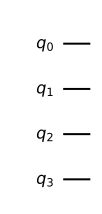

In [4]:
# establece la longitud de la cadena de entrada de n bits.
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()

### 4.2 Oráculo Balanceado <a id="balanced_oracle"></a>

In [5]:
balanced_oracle = QuantumCircuit(n+1)

A continuación, creamos un oráculo balanceado. Como vimos en la sección 1b, podemos generar un oráculo balanceado realizando CNOT con cada qubit de entrada como control y el bit de salida como objetivo. Podemos variar los estados de entrada que dan 0 o 1 envolviendo algunos de los controles en compuertas X. Primero elijamos una cadena binaria de longitud `n` que dicte qué controles ajustar:

In [6]:
b_str = "101"

Ahora que tenemos esta cadena, podemos usarla como clave para colocar nuestras compuertas X. Para cada qubit en nuestro circuito, colocamos una compuerta X si el dígito correspondiente en `b_str` es `1` , o no hacemos nada si el dígito es `0` .

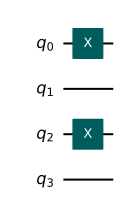

In [7]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Colocar compuertas X
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw()

A continuación, hacemos nuestras compuertas NOT controladas, usando cada qubit de entrada como control y el qubit de salida como objetivo:

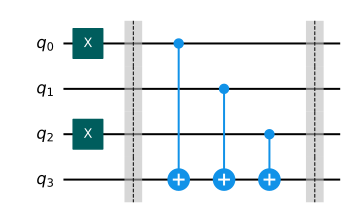

In [8]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Colocar compuertas X
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Usar una barrera como divisor
balanced_oracle.barrier()

# Compuertas NOT controladas
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()
balanced_oracle.draw()

Finalmente, repetimos el código de dos celdas en adelante para terminar de envolver los controles en compuertas X:

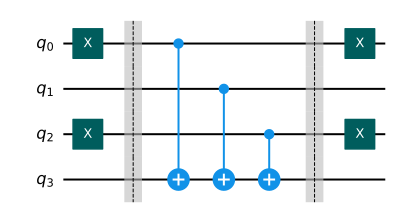

In [9]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Colocar compuertas X
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Usar una barrera como divisor
balanced_oracle.barrier()

# Compuertas NOT controladas
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Colocar compuertas X
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Mostrar el oráculo
balanced_oracle.draw()

¡Acabamos de crear un oráculo balanceado! Todo lo que queda por hacer es ver si el algoritmo Deutsch-Jozsa puede resolverlo.

### 4.3 El Algoritmo Completo <a id="full_alg"></a>

Ahora vamos a poner todo junto. Este primer paso en el algoritmo es inicializar los qubits de entrada en el estado $|{+}\rangle$ y el qubit de salida en el estado $|{-}\rangle$:

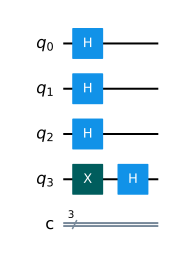

In [10]:
dj_circuit = QuantumCircuit(n+1, n)

# Aplicar compuertas H
for qubit in range(n):
    dj_circuit.h(qubit)

# Poner el qubit en el estado |->
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw()

A continuación, apliquemos el oráculo. Aquí aplicamos el `balanced_oracle` que creamos arriba:

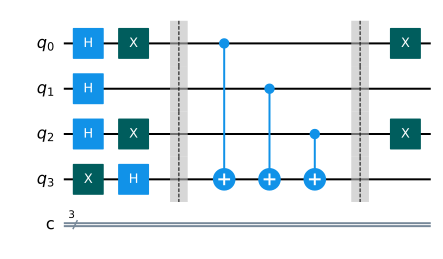

In [13]:
dj_circuit = QuantumCircuit(n+1, n)

# Aplicar compuertas H
for qubit in range(n):
    dj_circuit.h(qubit)

# Poner el qubit en el estado |->
dj_circuit.x(n)
dj_circuit.h(n)

# Agregar el oráculo
dj_circuit = dj_circuit.compose(balanced_oracle)
dj_circuit.draw()

Finalmente, aplicamos compuertas H en los $n$ qubits de entrada y medimos nuestro registro de entrada:

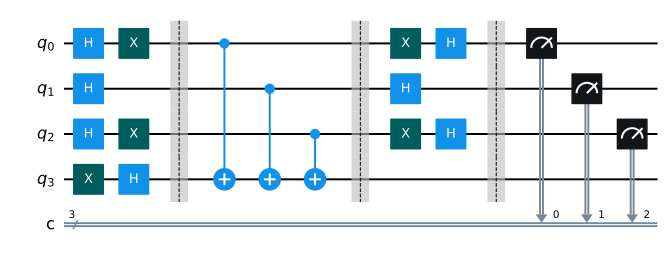

In [14]:
dj_circuit = QuantumCircuit(n+1, n)

# Aplicar compuertas H
for qubit in range(n):
    dj_circuit.h(qubit)

# Poner el qubit en el estado |->
dj_circuit.x(n)
dj_circuit.h(n)

# Agregar el oráculo
dj_circuit = dj_circuit.compose(balanced_oracle)

# Repetir compuertas H
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Medir
for i in range(n):
    dj_circuit.measure(i, i)

# Mostrar el circuito
dj_circuit.draw()

Veamos la salida:

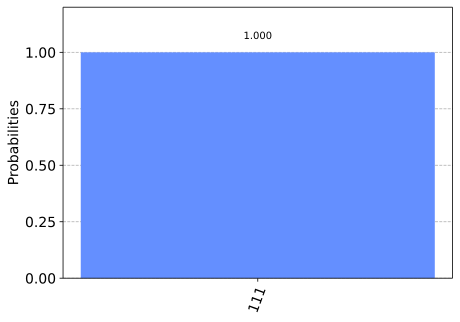

In [15]:
# usar un simulador local
aer_sim = Aer.get_backend('aer_simulator')
results = aer_sim.run(dj_circuit).result()
answer = results.get_counts()

plot_histogram(answer)

Podemos ver a partir de los resultados anteriores que tenemos un 0% de probabilidad de medir `000`. Esto predice correctamente que la función está balanceada. 

### 4.4 Circuitos Generalizados <a id="general_circs"></a>

A continuación, proporcionamos una función generalizada que crea oráculos Deutsch-Jozsa y los convierte en compuertas cuánticas. Toma el `case` , (ya sea `'balanced'` o '`constant`'), y `n`, el tamaño del registro de entrada:

In [16]:
def dj_oracle(case, n):
    # Necesitamos hacer un objeto QuantumCircuit para devolver
    # Este circuito tiene n+1 qubits: el tamaño de la entrada,
    # más un qubit de salida
    oracle_qc = QuantumCircuit(n+1)
    
    # Primero, tratemos el caso en el que oráculo está balanceado
    if case == "balanced":
        # Primero genera un número aleatorio que nos diga qué CNOT 
        # envolver en compuertas X:
        b = np.random.randint(1,2**n)
        # A continuación, formatea 'b' como una cadena binaria de longitud 'n', rellenada con ceros:
        b_str = format(b, '0'+str(n)+'b')
        # Después, colocamos las primeras compuertas X. Cada dígito en nuestra cadena binaria
        # corresponde a un qubit, si el dígito es 0, no hacemos nada, si es 1,
        # aplicamos una compuerta X a ese qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Haz las compuertas NOT controladas para cada qubit, utilizando el qubit de salida
        # como el objetivo:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Luego, coloca las compuertas X finales
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Caso en el que oráculo es constante
    if case == "constant":
        # Primero decide cuál será la salida fija del oráculo
        # (ya sea siempre 0 o siempre 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # Para mostrar cuando presentamos el circuito
    return oracle_gate

También vamos a crear una función que tome esta compuerta del oráculo y ejecute el algoritmo Deutsch-Jozsa en ella:

In [17]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Configurar el qubit de salida:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # Y configurar el registro de entrada:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Agreguemos la compuerta del oráculo a nuestro circuito:
    dj_circuit.append(oracle, range(n+1))
    # Finalmente, ejecutar las compuertas H nuevamente y medir:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

Finalmente, usemos estas funciones para jugar con el algoritmo:

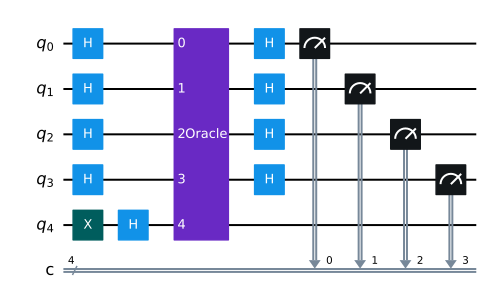

In [18]:
n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw()

Y observa los resultados de ejecutar este circuito:

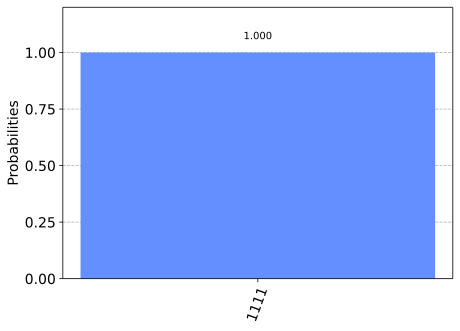

In [19]:
transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
results = aer_sim.run(transpiled_dj_circuit).result()
answer = results.get_counts()
plot_histogram(answer)

## 5. Experimenta con Dispositivos Reales <a id="device"></a>

Podemos ejecutar el circuito en el dispositivo real como se muestra a continuación. Primero buscamos el dispositivo menos ocupado que pueda manejar nuestro circuito.

In [20]:
# Cargar nuestras cuentas IBMQ guardadas y obtener el dispositivo backend menos ocupado con más o igual a (n+1) qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("backend menos ocupado: ", backend)

backend menos ocupado:  ibmq_belem


In [21]:
# Ejecutar nuestro circuito en el backend menos ocupado. Supervisar la ejecución del trabajo (job) en la fila
from qiskit.tools.monitor import job_monitor

transpiled_dj_circuit = transpile(dj_circuit, backend, optimization_level=3)
job = backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


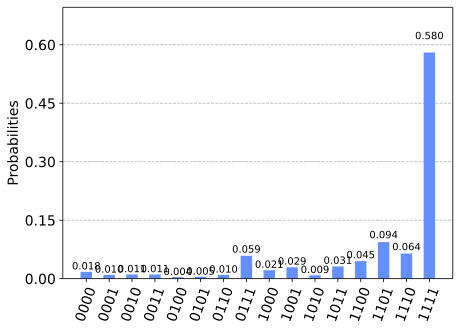

In [22]:
# Obtener los resultados del cálculo
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

Como podemos ver, el resultado más probable es `1111`. Los otros resultados se deben a errores en el cálculo cuántico. 

## 6. Problemas <a id="problems"></a>

1. ¿Eres capaz de crear un oráculo balanceado o constante de una forma diferente?

2. La función `dj_problem_oracle` (a continuación) devuelve un oráculo de Deutsch-Jozsa para `n = 4` en forma de compuerta. La compuerta toma 5 qubits como entrada, donde el qubit final (`q_4`) es el qubit de salida (como en el ejemplo de los oráculos anteriores). Puedes obtener diferentes oráculos dando a `dj_problem_oracle` diferentes números enteros entre 1 y 5. Usa el algoritmo Deutsch-Jozsa para decidir si cada oráculo es balanceado o constante (**Nota:** se recomienda probar este ejemplo usando `aer_simulator` en lugar de un dispositivo real).

In [ ]:
from qiskit_textbook.problems import dj_problem_oracle
oracle = dj_problem_oracle(1)

## 7. Referencias <a id="references"></a>

1. David Deutsch and Richard Jozsa (1992). "Rapid solutions of problems by quantum computation". Proceedings of the Royal Society of London A. 439: 553–558.  [doi:10.1098/rspa.1992.0167](https://doi.org/10.1098%2Frspa.1992.0167).
2. R. Cleve; A. Ekert; C. Macchiavello; M. Mosca (1998). "Quantum algorithms revisited". Proceedings of the Royal Society of London A. 454: 339–354. [doi:10.1098/rspa.1998.0164](https://doi.org/10.1098%2Frspa.1998.0164).

In [23]:
import qiskit.tools.jupyter
%qiskit_version_table

/usr/local/anaconda3/envs/terra-unstable/lib/python3.9/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
